In [100]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
% matplotlib inline

In [101]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [103]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [104]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

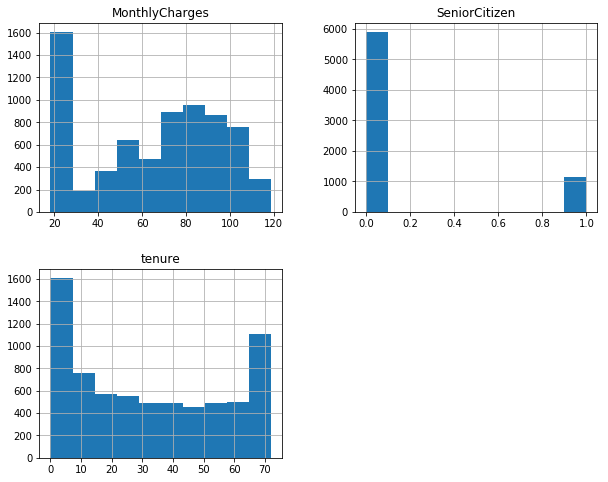

In [105]:
df.hist(figsize=(10,8));

In [106]:
df.keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [107]:
for col in df:
    print (col, df[col].unique())

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [108]:
# Check if there is unexpected values in categorical columns
cat_list=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']
for c in cat_list:
    print(df[c].value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                

In [109]:
df_2 = pd.get_dummies(data = df, columns = ['Churn'], drop_first = True)
df_2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [110]:
churn = df_2.Churn_Yes == True
not_churn = df_2.Churn_Yes == False
print(df_2[churn].shape[0], df_2[not_churn].shape[0])
print(df_2.Churn_Yes.mean())


1869 5174
0.2653698707936959


### Does tenure have impact to customer churn?

In [111]:
display(df_2[churn].tenure.describe(), df_2[not_churn].tenure.describe())

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

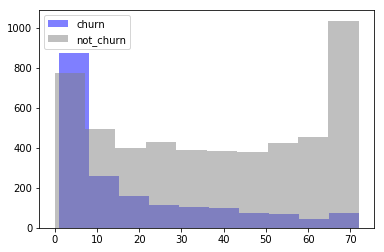

In [112]:
plt.hist(df_2[churn].tenure, alpha=0.5, color = 'blue', label='churn');
plt.hist(df_2[not_churn].tenure, alpha=0.5, color = 'grey', label='not_churn');
plt.legend();

C:\Users\DorisDu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


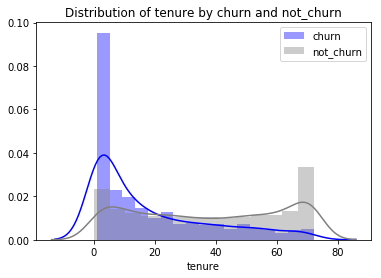

In [113]:
import seaborn as sns
# Visualize distribution plot 

sns.distplot(df_2[churn].tenure, color='blue', label='churn');
sns.distplot(df_2[not_churn].tenure, color='grey', label='not_churn');
plt.legend();
plt.title('Distribution of tenure by churn and not_churn')
plt.show();

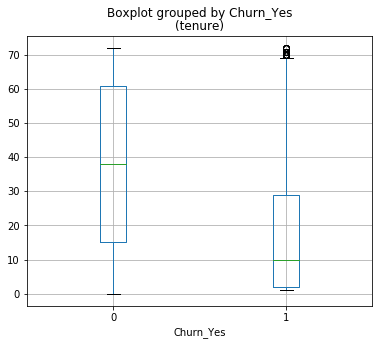

In [114]:
# Visualize boxplot 

df_2.boxplot(column='tenure', by='Churn_Yes', figsize=(6,5))
plt.title('(tenure)');

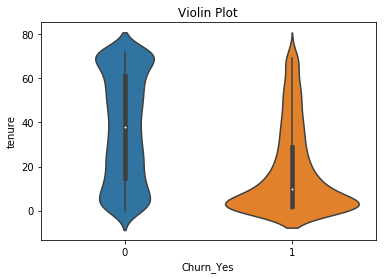

In [115]:
# Visualize violin plot 

sns.violinplot(x='Churn_Yes', y='tenure', data=df_2)
plt.title('Violin Plot');

In [116]:
# perform t test to test if the mean are really difference
from scipy import stats

stats.ttest_ind(df_2[churn].tenure,df_2[not_churn].tenure,)


Ttest_indResult(statistic=-31.57955051135377, pvalue=7.99905796059022e-205)

In [117]:
import statsmodels.api as sm


In [118]:
df_2['intercept']=1
logit_mod = sm.Logit(df_2['Churn_Yes'], df_2[['intercept','tenure']])

In [119]:
logit_result = logit_mod.fit()
logit_result.summary2()

Optimization terminated successfully.
         Current function value: 268.042264
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:              Logit            No. Iterations:   6.0000      
Dependent Variable: Churn_Yes        Pseudo R-squared: -0.403      
Date:               2018-05-18 15:51 AIC:              3775647.3267
No. Observations:   7043             BIC:              3775661.0462
Df Model:           1                Log-Likelihood:   -1.8878e+06 
Df Residuals:       7041             LL-Null:          -1.3459e+06 
Converged:          1.0000           Scale:            1.0000      
--------------------------------------------------------------------
                Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
--------------------------------------------------------------------
intercept       0.0273    0.0422    0.6469  0.5177  -0.0554   0.1101
tenure         -0.0388    0.0014  -27.5863  0.0000  -0.0415  -0.0360
===================================================================

"""

In [120]:
1/ np.exp(-0.0388)

1.0395625503474513

### Does MonthlyCharges have impact to customer churn?

In [121]:
display(df_2[churn].MonthlyCharges.describe(), df_2[not_churn].MonthlyCharges.describe())

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

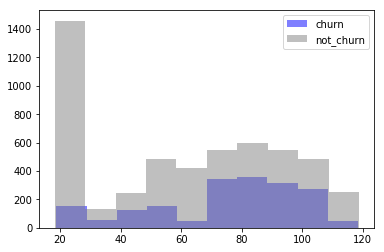

In [122]:
plt.hist(df_2[churn].MonthlyCharges, alpha=0.5, color = 'blue', label='churn');
plt.hist(df_2[not_churn].MonthlyCharges, alpha=0.5, color = 'grey', label='not_churn');
plt.legend();

C:\Users\DorisDu\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


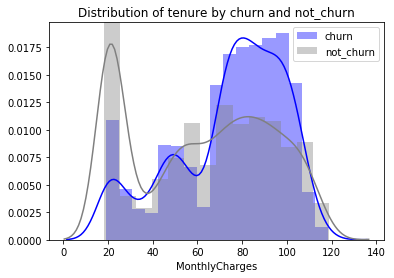

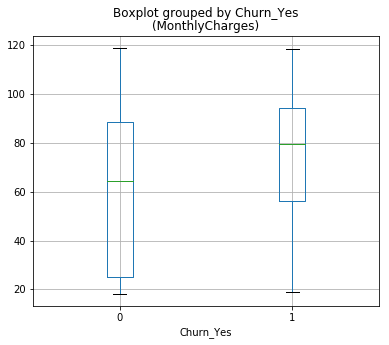

In [123]:
sns.distplot(df_2[churn].MonthlyCharges, color='blue', label='churn');
sns.distplot(df_2[not_churn].MonthlyCharges, color='grey', label='not_churn');
plt.legend();
plt.title('Distribution of tenure by churn and not_churn')
plt.show();

df_2.boxplot(column='MonthlyCharges', by='Churn_Yes', figsize=(6,5))
plt.title('(MonthlyCharges)');


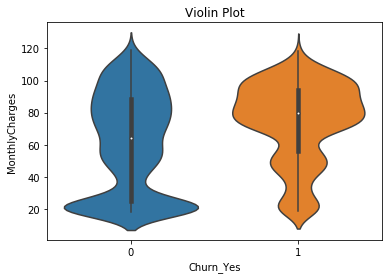

In [124]:
sns.violinplot(x='Churn_Yes', y='MonthlyCharges', data=df_2)
plt.title('Violin Plot');

In [125]:
stats.ttest_ind(df_2[churn].MonthlyCharges, df_2[not_churn].MonthlyCharges)

Ttest_indResult(statistic=16.53673801593631, pvalue=2.706645606888261e-60)

In [126]:
logit_mod = sm.Logit(df_2['Churn_Yes'], df_2[['intercept','tenure','MonthlyCharges']])
logit_result = logit_mod.fit()
logit_result.summary2()

Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\DorisDu\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\DorisDu\Anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   7.0000     
Dependent Variable: Churn_Yes        Pseudo R-squared: -inf       
Date:               2018-05-18 15:51 AIC:              inf        
No. Observations:   7043             BIC:              inf        
Df Model:           2                Log-Likelihood:   -inf       
Df Residuals:       7040             LL-Null:          -1.3459e+06
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept         -1.8024   0.0866 -20.8235 0.0000 -1.9721 -1.6328
tenure            -0.0548   0.0017 -32.4742 0.0000 -0.0582 -0.0515
MonthlyCharges     0.0330   0.0013  25.3733 0.0000  0.0304  0.0355
==================================================================

"""

In [127]:
np.exp(0.0330)

1.0335505392413056

### Does total charges has impact on the churn?

In [128]:
df_2.isnull().values.any()

False

In [129]:
df_2.iloc[488]

customerID                         4472-LVYGI
gender                                 Female
SeniorCitizen                               0
Partner                                   Yes
Dependents                                Yes
tenure                                      0
PhoneService                               No
MultipleLines                No phone service
InternetService                           DSL
OnlineSecurity                            Yes
OnlineBackup                               No
DeviceProtection                          Yes
TechSupport                               Yes
StreamingTV                               Yes
StreamingMovies                            No
Contract                             Two year
PaperlessBilling                          Yes
PaymentMethod       Bank transfer (automatic)
MonthlyCharges                          52.55
TotalCharges                                 
Churn_Yes                                   0
intercept                         

In [130]:
df_2[df.tenure == 0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [131]:
df_2.iloc[df_2[df.tenure == 0].index, 19]= '0.0'

In [132]:
df_2[df.tenure == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_Yes,intercept
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0.0,0,1
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0.0,0,1
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,No,Yes,Yes,Two year,No,Mailed check,80.85,0.0,0,1
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0.0,0,1
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0.0,0,1
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0.0,0,1
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0.0,0,1
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0.0,0,1
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0.0,0,1
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,No,Two year,No,Mailed check,73.35,0.0,0,1


In [137]:
df_2.TotalCharges = pd.to_numeric(df_2.TotalCharges)

In [138]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn_Yes           7043 non-null uint8
intercept           7043 non-null

In [139]:
display(df_2[churn].TotalCharges.describe(), df_2[not_churn].TotalCharges.describe())

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

count    5174.000000
mean     2549.911442
std      2329.954215
min         0.000000
25%       572.900000
50%      1679.525000
75%      4262.850000
max      8672.450000
Name: TotalCharges, dtype: float64